# Практика

## Определение вероятности. События

Требуется сгенерировать необходимые выборки и произвести по ним расчеты

### Задача 1
Брошено две монеты. Найти вероятность того, что монеты выпали разными сторонами

In [2]:
2/4

0.5

### Задача 2
Брошено три монеты. Описать множество всех элементарных событий. Найти вероятности следующих событий:


1.   A = {не выпало ни одного герба}
2.   B = {выпало четное число гербов}
3.   C = {на третьей монете выпал герб}


In [18]:
import random
import numpy as np

In [50]:
coin = (0,1) # 0 - Орёл(Герб) , 1 - Решка 
case_list = []
iterate = 10000
for i in range (iterate):
    case_list.append((random.choice(coin),random.choice(coin),random.choice(coin)))
case_set = set(case_list)
case_set

{(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)}

In [51]:
from collections import Counter
count_case = Counter(case_list)

In [52]:
count_case_list = list(count_case.items())
count_case_list

[((1, 0, 0), 1190),
 ((1, 1, 1), 1252),
 ((0, 0, 1), 1287),
 ((1, 1, 0), 1222),
 ((0, 1, 1), 1250),
 ((0, 1, 0), 1227),
 ((1, 0, 1), 1263),
 ((0, 0, 0), 1309)]

In [65]:
cnt_case_A = 0
for i in count_case_list:
    if i[0] == (1, 1, 1):
        cnt_case_A += i[1] 

print("Case A probability is ",cnt_case_A/iterate*100,'%', sep='') 

Case A probability is 12.520000000000001%


In [64]:
cnt_case_B = 0
for i in count_case_list:
    if i[0] == (0, 1, 0) or i[0] == (0, 0, 1) or i[0] == (1, 0, 0):
        cnt_case_B += i[1] 

print("Case B probability is ",cnt_case_B/iterate*100,'%', sep='') 

37.04%


In [66]:
cnt_case_C = 0
for i in count_case_list:
    if i[0] == (0, 0, 1) or i[0] == (0, 1, 1) or i[0] == (1, 0, 1) or i[0] == (1, 1, 1):
        cnt_case_C += i[1] 

print("Case C probability is ",cnt_case_C/iterate*100,'%', sep='') 

Case C probability is 50.519999999999996%


Решил поиграться с генератором, построить вероятности в зависимости от кол-ва подбросов

<function matplotlib.pyplot.show(*args, **kw)>

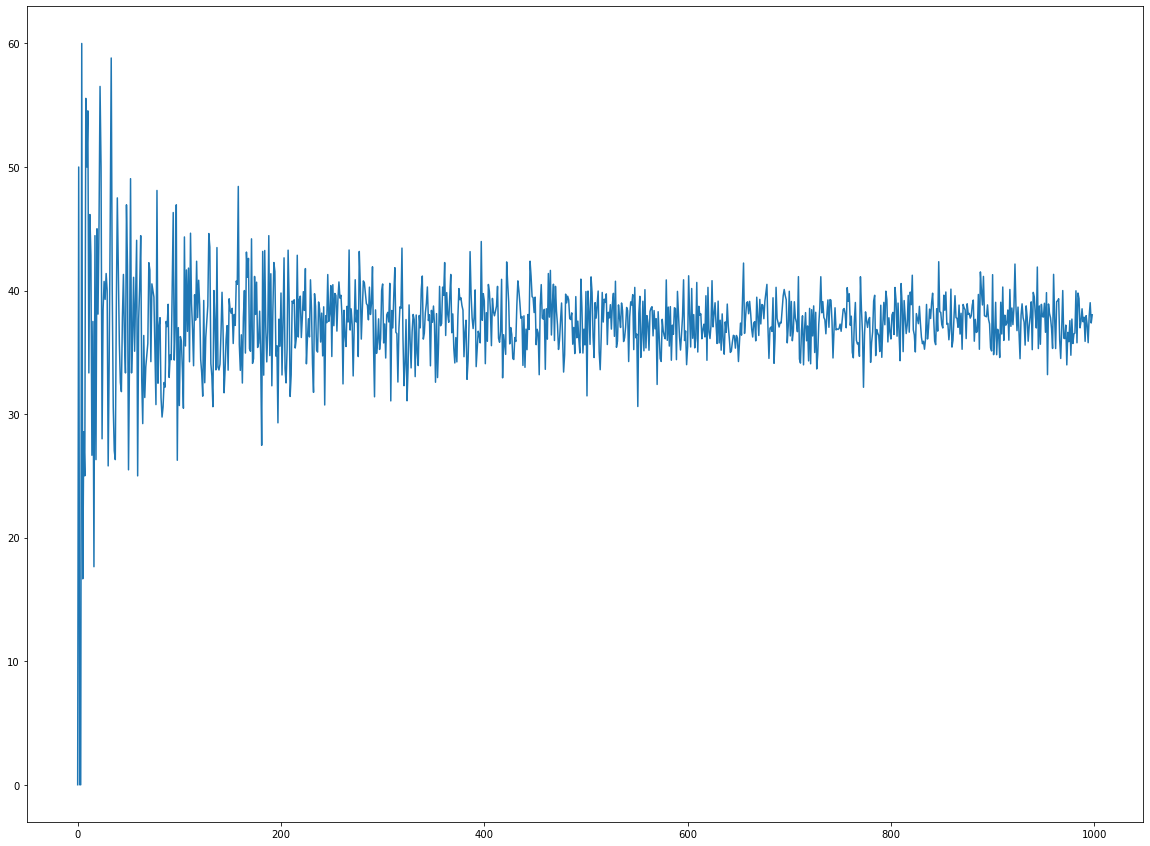

In [21]:
%matplotlib inline
import random
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt


def generator_case_b(iterate):
    coin = (0,1) 
    case_list = []
    for i in range (iterate):
        case_list.append((random.choice(coin),random.choice(coin),random.choice(coin)))
    count_case = Counter(case_list)
    count_case_list = list(count_case.items())
    cnt_case_b = 0
    for i in count_case_list:
        if i[0] == (0, 1, 0) or i[0] == (0, 0, 1) or i[0] == (1, 0, 0):
            cnt_case_b += i[1] 
    return cnt_case_b/iterate*100

plot_list = []
L = range(1,1000)  #меняем вот эти показатели для получения различной выборки
genarated_case_b_list = list(map(lambda x: generator_case_b(x),L))


plt.figure(figsize=(20, 15))
plt.plot(genarated_case_b_list)
plt.show


Предлагается также решить задачи: 

### Задача 3
Из двух претендентов E и L на ответственную должность три члена комиссии должны отобрать одного. Каждый член комиссии должен указать либо одного достойного, либо забраковать обоих. Претендент считается выбранным, если он был признана достойным хотя бы двумя членами комиссии.
Найти вероятность событий:

A = {рекомендован L}, B = {рекомендован E}


In [31]:
prepod_choice = (0,1,2) # 0 - забракованы оба , 1 - Выбран L, 2 - Выбран E
case_a = [(1,1,1),(1,1,0),(1,0,1),(0,1,1),(1,1,2),(1,2,1),(2,1,1)]

case_list = []
iterate = 10000

for i in range (iterate):
    case_list.append((random.choice(prepod_choice),random.choice(prepod_choice),random.choice(prepod_choice)))
count_case = Counter(case_list)

count_case_list = list(count_case.items())
cnt_case_a = 0
for i in count_case_list:
    if i[0] in case_a:
        cnt_case_a += i[1] 

 # у обоих претендентов одинаковые шансы, соответственно их можно приравнять

print("Case A and Case B probabilities both are near ",cnt_case_a/iterate*100,'%', sep='') 

Case A and Case B probability both are near 25.46%


### Задача 4
Брошено две игральных кости. Описать множество элементарных событий. Найти вероятности событий:

A = {вышло две "шестерки"}

B = {сумма выпавших очков не меньше 11}

C = {не выпала ни одна "шестерка"}

In [19]:
case_a = 12
case_b = 11

case_list = []
iterate = 10000

for i in range (iterate):
    case_list.append((random.randrange(1,7),random.randrange(1,7)))
count_case = Counter(case_list)
count_case_list = list(count_case.items())


cnt_case_a = 1/36
 

print("Case A probability is ",cnt_case_a*100,'%', sep='') 

cnt_case_b = 0
for i in count_case_list:
    if  sum((i[0])) >= 11:
        cnt_case_b += i[1] 

print("Case B probability is ",cnt_case_b/iterate*100,'%', sep='') 


cnt_case_c = 0
for i in count_case_list:
    if 6 not in i[0]:
        cnt_case_c += i[1] 

print("Case C probability is ",cnt_case_c/iterate*100,'%', sep='') 

Case A probability is 2.7777777777777777%
Case B probability is 8.690000000000001%
Case C probability is 69.1%


## Вероятность суммы событий

### Задача 5
Брошены две игральные кости. Найти вероятность события D = {выпала хотя бы одна шестёрка}


In [63]:
(1 - cnt_case_c/iterate) *100 # Вычесть вероятность события, где не выпадает ни одной 6
# или
cnt_case_d = 0
for i in count_case_list:
    if 6 in i[0]:
        cnt_case_d += i[1] 

print("Case D probability is ",cnt_case_d/iterate*100,'%', sep='')

Case D probability is 30.409999999999997%


Предлагается также решить задачи: 

### Задача 6
В телефонном номере три последние цифры стерлись. Считая, что все возможные значения стершихся цифр равновероятны, найти вероятность событий:

A = {Стерлись различные цифры},

B = {Стерлись одинаковые цифры},

C = {Среди стершихся цифр хотя бы две совпадают},

D = {Среди стершихся цифр хотя бы две различны}


In [69]:
six_a = (999 - 9) / 999
six_b = 1- A
six_b
six_c

0.009009009009009028

## Случайные величины

### Задача 7
В лотерее имеется 10 билетов, из которых один выигрышный. Размер выигрыша 10 ден. ед.; стоимость билета 1 ден ед. Найти закон распределения случайной величины X, равной чистому выигрышу участника лотереи, который вытаскивает билет первым.

<function matplotlib.pyplot.show(*args, **kw)>

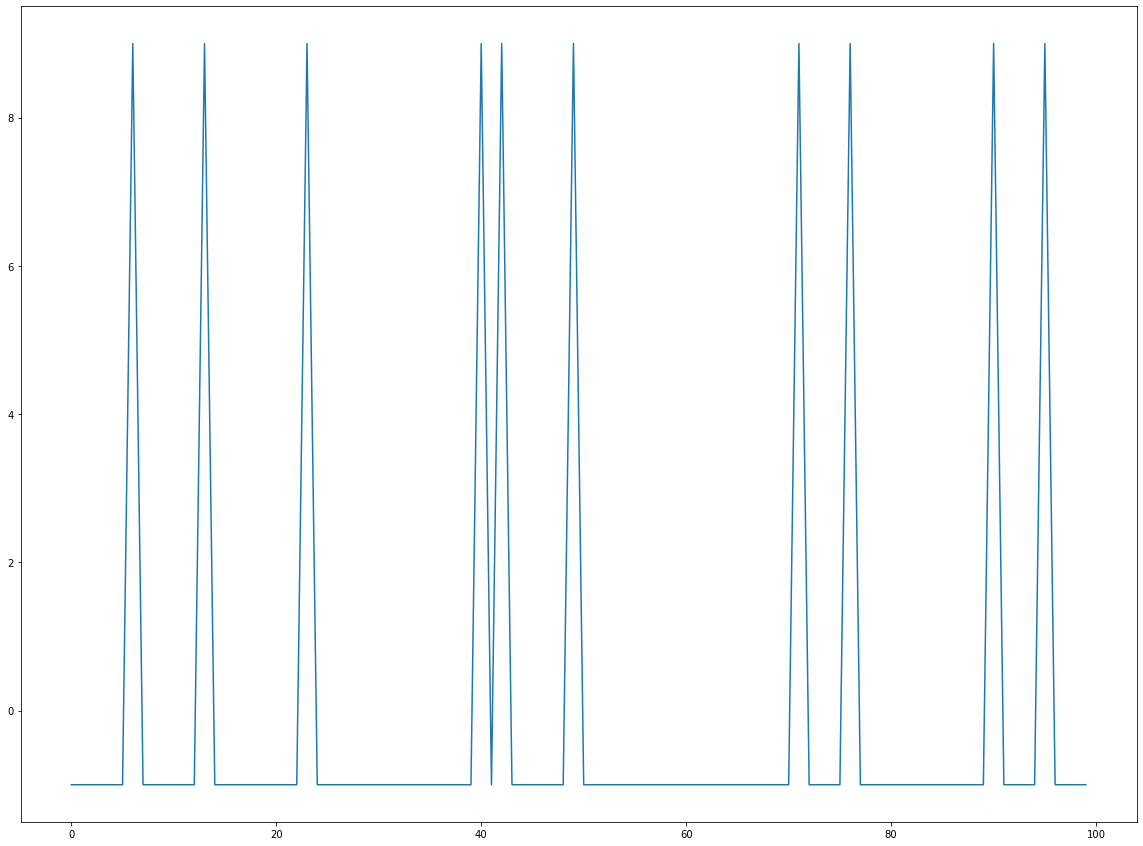

In [1]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


bernoulli_rv = sts.bernoulli(0.1)

sr_bernoulli = pd.Series(bernoulli_rv.rvs(100))
sr_formed = sr_bernoulli.replace([0,1], [-1,9])

plt.figure(figsize=(20, 15))
plt.plot(sr_formed)
plt.show

Предлагается также решить задачу: 

### Задача 8
Брошены две игральные кости. Найти закон распределения случайной величины $X$, равной сумме выпавших очков. Найти вероятности событий ${X <= 4}$, ${X > 4}$

In [27]:
import random
from collections import Counter

kubik = range(7)
main_value = 4

case_list = []
iterate = 10000

for i in range (iterate):
    case_list.append((random.choice(kubik),random.choice(kubik)))

count_case = Counter(case_list)
count_case_list = list(count_case.items())
count_case_list

cnt_case_a = 0
cnt_in_tuple = 0
for i in count_case_list:
    
    cnt_in_tuple = 0
    
    for j in i[0]:
        cnt_in_tuple += j
        
    if cnt_in_tuple <= main_value:
        cnt_case_a += i[1] 


cnt_case_b = 0
cnt_in_tuple = 0
for i in count_case_list:
    
    cnt_in_tuple = 0
    
    for j in i[0]:
        cnt_in_tuple += j
        
    if cnt_in_tuple > main_value:
        cnt_case_b += i[1] 
        
        
print("Case A (X <= 4)  probability is ",cnt_case_a/iterate*100,'%', sep='') 
print("Case B (X > 4) probability is ",cnt_case_b/iterate*100,'%', sep='') 

Case A (X <= 4)  probability is 32.22%
Case B (X > 4) probability is 67.78%


## Условные вероятности

### Задача 9
Из колоды (36 карт) вынимают последовательно без возвращения две карты. Найти вероятность того, что первой картой была шестерка(A), а второй — семерка(B). Найти условную вероятность того же события при условии, что обе карты бубновой масти (C).


In [39]:
P_AB = 4/36 * 4/35
print('P(AB) =',P_AB*100,'%')

P_AB_C = (1/9)*(1/8) / (1/4 * 8/35)
print('P(AB|C) =',P_AB_C*100,'%')

P(AB) = 1.2698412698412698 %
P(AB|C) = 24.305555555555554 %


Предлагается также решить задачу: 

### Задача 10
Из урны, содержащей два белых и три черных шара, последовательно извлекают два шара; вынутые шары не возвращаются. Если первый шар оказался черным, то перед вторым извлечением в урну добавляют белый шар. В противном случае состав оставшихся шаров не меняют. Найти вероятности событий:

$A$ = {извлечены два белых шара},

$B$ = {извлечены два черных шара}

Указание. Пусть событие $C_1$ = {первый шар белый}, событие $C_2$ = {второй шар белый}. Тогда $A = C_1C_2$, $B = \overline C_1 \overline C_2$ 

In [40]:
P_A = 2/5 * 1/4
print('P(A) =',P_A*100,'%')
P_B = 2/5 * 2/5
print('P(B) =',P_B*100,'%')

P(A) = 10.0 %
P(B) = 16.0 %
